#Initialization Techniques

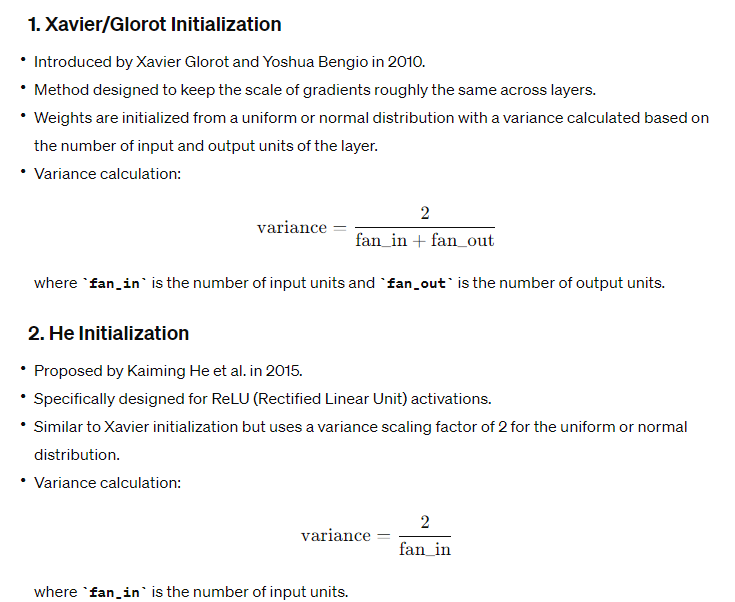

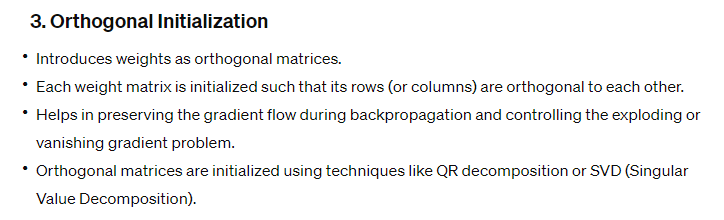

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape and one-hot encode labels
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define a function to create a neural network model with different initialization methods
def create_model(init_method):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer=init_method, input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer=init_method),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer=init_method),
        layers.Flatten(),
        layers.Dense(64, activation='relu', kernel_initializer=init_method),
        layers.Dense(10, activation='softmax', kernel_initializer=init_method)
    ])
    return model

# Initialize models with different initialization methods
xavier_model = create_model(initializers.GlorotUniform())
he_model = create_model(initializers.he_uniform())
orthogonal_model = create_model(initializers.Orthogonal())

# Compile and train models
def compile_and_train(model):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)

# Train models with different initialization methods
print("Training with Xavier/Glorot Initialization:")
compile_and_train(xavier_model)

print("\nTraining with He Initialization:")
compile_and_train(he_model)

print("\nTraining with Orthogonal Initialization:")
compile_and_train(orthogonal_model)

# Evaluate models on test data
def evaluate_model(model):
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print(f"\nTest accuracy: {test_acc}")

print("\nEvaluation Results:")
print("Xavier/Glorot Initialization:")
evaluate_model(xavier_model)

print("\nHe Initialization:")
evaluate_model(he_model)

print("\nOrthogonal Initialization:")
evaluate_model(orthogonal_model)

11490434/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values each tim

Training with Xavier/Glorot Initialization:
Epoch 1/10
844/844 [==============================] - 58s 67ms/step - loss: 0.1999 - accuracy: 0.9379 - val_loss: 0.0544 - val_accuracy: 0.9840
Epoch 2/10
844/844 [==============================] - 47s 56ms/step - loss: 0.0543 - accuracy: 0.9829 - val_loss: 0.0433 - val_accuracy: 0.9870
Epoch 3/10
844/844 [==============================] - 48s 57ms/step - loss: 0.0370 - accuracy: 0.9886 - val_loss: 0.0393 - val_accuracy: 0.9900
Epoch 4/10
844/844 [==============================] - 47s 56ms/step - loss: 0.0304 - accuracy: 0.9907 - val_loss: 0.0393 - val_accuracy: 0.9907
Epoch 5/10
844/844 [==============================] - 50s 59ms/step - loss: 0.0227 - accuracy: 0.9929 - val_loss: 0.0377 - val_accuracy: 0.9897
Epoch 6/10
844/844 [==============================] - 46s 54ms/step - loss: 0.0195 - accuracy: 0.9938 - val_loss: 0.0409 - val_accuracy: 0.9885
Epoch 7/10
844/844 [==============================] - 50s 59ms/step - loss: 0.0163 - accurac

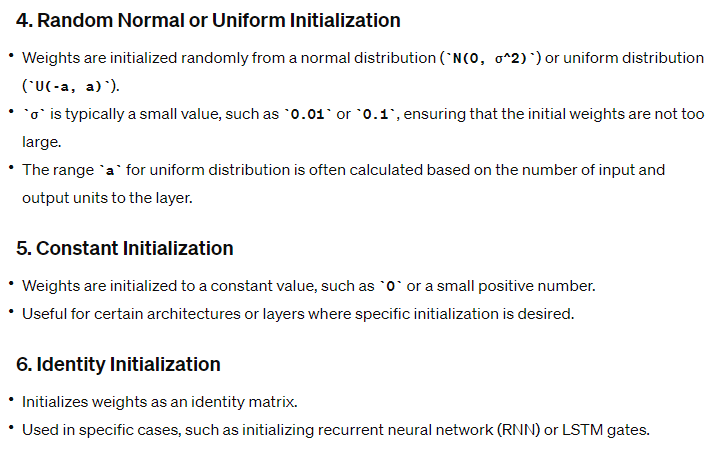

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Flatten images and one-hot encode labels
train_images = train_images.reshape((60000, 784))
test_images = test_images.reshape((10000, 784))
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define a function to create a neural network model with different initialization methods
def create_model(init_method):
    model = models.Sequential([
        layers.Dense(128, activation='relu', kernel_initializer=init_method, input_shape=(784,)),
        layers.Dense(64, activation='relu', kernel_initializer=init_method),
        layers.Dense(10, activation='softmax', kernel_initializer=init_method)
    ])
    return model

# Initialize models with different initialization methods
random_normal_model = create_model(initializers.RandomNormal(mean=0.0, stddev=0.01))
random_uniform_model = create_model(initializers.RandomUniform(minval=-0.05, maxval=0.05))
constant_model = create_model(initializers.Constant(value=0.1))
identity_model = create_model(initializers.Identity())

# Compile and train models
def compile_and_train(model):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)

# Train models with different initialization methods
print("Training with Random Normal Initialization:")
compile_and_train(random_normal_model)

print("\nTraining with Random Uniform Initialization:")
compile_and_train(random_uniform_model)

print("\nTraining with Constant Initialization:")
compile_and_train(constant_model)

print("\nTraining with Identity Initialization:")
compile_and_train(identity_model)

# Evaluate models on test data
def evaluate_model(model):
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print(f"\nTest accuracy: {test_acc}")

print("\nEvaluation Results:")
print("Random Normal Initialization:")
evaluate_model(random_normal_model)

print("\nRandom Uniform Initialization:")
evaluate_model(random_uniform_model)

print("\nConstant Initialization:")
evaluate_model(constant_model)

print("\nIdentity Initialization:")
evaluate_model(identity_model)

Training with Random Normal Initialization:
Epoch 1/10
844/844 [==============================] - 5s 5ms/step - loss: 0.5019 - accuracy: 0.8477 - val_loss: 0.2048 - val_accuracy: 0.9397
Epoch 2/10
844/844 [==============================] - 5s 6ms/step - loss: 0.2041 - accuracy: 0.9406 - val_loss: 0.1383 - val_accuracy: 0.9607
Epoch 3/10
844/844 [==============================] - 6s 7ms/step - loss: 0.1413 - accuracy: 0.9576 - val_loss: 0.1167 - val_accuracy: 0.9668
Epoch 4/10
844/844 [==============================] - 4s 5ms/step - loss: 0.1079 - accuracy: 0.9678 - val_loss: 0.1056 - val_accuracy: 0.9707
Epoch 5/10
844/844 [==============================] - 6s 7ms/step - loss: 0.0870 - accuracy: 0.9742 - val_loss: 0.0947 - val_accuracy: 0.9717
Epoch 6/10
844/844 [==============================] - 5s 6ms/step - loss: 0.0691 - accuracy: 0.9789 - val_loss: 0.0970 - val_accuracy: 0.9715
Epoch 7/10
844/844 [==============================] - 5s 6ms/step - loss: 0.0600 - accuracy: 0.9807 - va

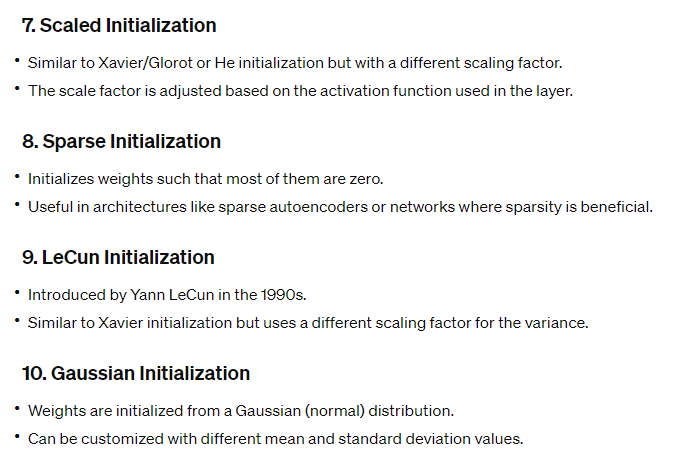

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Flatten images and one-hot encode labels
train_images = train_images.reshape((60000, 784))
test_images = test_images.reshape((10000, 784))
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define a function to create a neural network model with different initialization methods
def create_model(init_method):
    model = models.Sequential([
        layers.Dense(128, activation='relu', kernel_initializer=init_method, input_shape=(784,)),
        layers.Dense(64, activation='relu', kernel_initializer=init_method),
        layers.Dense(10, activation='softmax', kernel_initializer=init_method)
    ])
    return model

# Initialize models with different initialization methods
scaled_model = create_model(initializers.VarianceScaling(scale=2.0))
truncated_normal_model = create_model(initializers.TruncatedNormal(mean=0.0, stddev=0.1))
lecun_model = create_model(initializers.LecunNormal())
gaussian_model = create_model(initializers.RandomNormal(mean=0.0, stddev=0.1))

# Compile and train models
def compile_and_train(model):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)

# Train models with different initialization methods
print("Training with Scaled Initialization:")
compile_and_train(scaled_model)

print("\nTraining with Truncated Normal Initialization:")
compile_and_train(truncated_normal_model)

print("\nTraining with LeCun Initialization:")
compile_and_train(lecun_model)

print("\nTraining with Gaussian Initialization:")
compile_and_train(gaussian_model)

# Evaluate models on test data
def evaluate_model(model):
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print(f"\nTest accuracy: {test_acc}")

print("\nEvaluation Results:")
print("Scaled Initialization:")
evaluate_model(scaled_model)

print("\nTruncated Normal Initialization:")
evaluate_model(truncated_normal_model)

print("\nLeCun Initialization:")
evaluate_model(lecun_model)

print("\nGaussian Initialization:")
evaluate_model(gaussian_model)

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer TruncatedNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer LecunNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Training with Scaled Initialization:
Epoch 1/10
844/844 [==============================] - 6s 6ms/step - loss: 0.2910 - accuracy: 0.9155 - val_loss: 0.1250 - val_accuracy: 0.9648
Epoch 2/10
844/844 [==============================] - 4s 5ms/step - loss: 0.1186 - accuracy: 0.9649 - val_loss: 0.0988 - val_accuracy: 0.9707
Epoch 3/10
844/844 [==============================] - 6s 7ms/step - loss: 0.0810 - accuracy: 0.9756 - val_loss: 0.0946 - val_accuracy: 0.9725
Epoch 4/10
844/844 [==============================] - 4s 5ms/step - loss: 0.0594 - accuracy: 0.9820 - val_loss: 0.0867 - val_accuracy: 0.9763
Epoch 5/10
844/844 [==============================] - 5s 6ms/step - loss: 0.0488 - accuracy: 0.9847 - val_loss: 0.0850 - val_accuracy: 0.9770
Epoch 6/10
844/844 [==============================] - 5s 6ms/step - loss: 0.0380 - accuracy: 0.9877 - val_loss: 0.0895 - val_accuracy: 0.9767
Epoch 7/10
844/844 [==============================] - 4s 5ms/step - loss: 0.0305 - accuracy: 0.9902 - val_loss: